### Part A

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_raw = pd.read_csv('CE802_P2_Data.csv')

In [5]:
df_raw.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,Class
0,3.4009,9.0180,0,2429.040,1.5729,-6901.08,-13.5480,-2204.77,-43.1740,-4.3000,...,-1.96,-7144.9,1,-4.4310,2451.300,12843.744,12.90000,-121.720,NaN,False
1,3.2476,7.4216,1,3365.160,4.3960,-8939.28,-12.7050,-149.17,-43.0300,-3.8674,...,-1.96,-7022.7,0,-6.3270,2274.330,12726.420,10.35480,-975.600,NaN,True
2,2.6765,7.3124,0,3616.860,1.8304,-8944.38,-7.2657,-1898.57,-42.7656,-4.0435,...,-1.96,-6071.9,0,-4.3770,2111.937,12842.944,21.25500,-362.220,NaN,False
3,3.2465,7.4268,0,2263.965,1.5357,-8197.68,-12.9780,-2195.97,-45.5070,-5.1800,...,-0.96,-6703.3,0,-2.3304,4110.300,12812.392,15.83700,-318.680,24.8,True
4,3.3116,7.6242,0,1669.560,1.5597,-8021.43,-8.9535,-2091.79,-45.5200,-6.4990,...,-0.96,-6999.9,1,-3.0663,3516.600,5396.160,9.69801,-285.372,24.3,True


In [6]:
df_raw.shape

(1000, 21)

In [7]:
df_raw.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15        0
F16        0
F17        0
F18        0
F19        0
F20      500
Class      0
dtype: int64

Only feature F20 has null values. (50%)

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   float64
 1   F2      1000 non-null   float64
 2   F3      1000 non-null   int64  
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   float64
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   float64
 9   F10     1000 non-null   float64
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   float64
 12  F13     1000 non-null   float64
 13  F14     1000 non-null   int64  
 14  F15     1000 non-null   float64
 15  F16     1000 non-null   float64
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   float64
 19  F20     500 non-null    float64
 20  Class   1000 non-null   bool   
dtypes: bool(1), float64(18), int64(2)
memo

All features except the Tarrgt variable (named as Class) are numerical.

In [9]:
df_raw.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,500.000000
mean,3.484358,8.460027,0.516000,2818.788916,1.753968,-7264.855469,-9.151815,-2081.014585,-52.012299,-4.318608,6.635745,-1.467000,-6635.307898,0.508000,-4.185798,3036.192399,12929.041422,12.632875,-137.867215,21.840200
std,0.869678,1.706913,0.499994,1587.054314,0.765717,2108.672583,1.819802,511.582397,10.285697,0.901204,1.805525,0.500201,1494.941683,0.500186,2.699756,3111.533532,3376.459608,2.708330,493.077434,2.311671
min,2.562220,6.662580,0.000000,-6622.740000,1.230002,-18454.980000,-18.252000,-6005.170000,-123.640000,-7.935000,4.724400,-1.960000,-14719.700000,0.000000,-14.466000,-10635.900000,5396.160000,9.666360,-3419.600000,15.120000
25%,2.833325,7.198000,0.000000,2203.710000,1.278987,-8108.212500,-10.157250,-2215.070000,-54.812500,-4.687000,5.292950,-1.960000,-7266.006500,0.000000,-5.634750,1835.760000,12794.090000,10.552350,-311.682500,20.240000
50%,3.229050,7.917500,1.000000,2460.795000,1.448400,-7679.910000,-8.737050,-2070.058500,-48.942000,-4.037250,6.067400,-1.960000,-7012.600000,1.000000,-3.314400,2416.500000,12831.722000,11.796750,-245.540000,21.800000
75%,3.869500,9.190000,1.000000,2926.260000,1.943675,-6984.855000,-7.700400,-1945.470000,-45.052000,-3.641825,7.428500,-0.960000,-6473.600000,1.000000,-2.080725,3376.725000,12870.380000,13.870500,-110.925000,23.390000
max,7.075000,15.566000,1.000000,19513.260000,7.309000,7180.020000,-6.870168,1398.830000,-41.862328,-3.382990,13.704000,-0.960000,3326.300000,1.000000,-1.264140,26354.100000,118370.160000,23.124000,3042.400000,28.600000


In [10]:
# Finding the the ration of Classes in the target varaible

target = df_raw.Class
target.value_counts()


True     502
False    498
Name: Class, dtype: int64

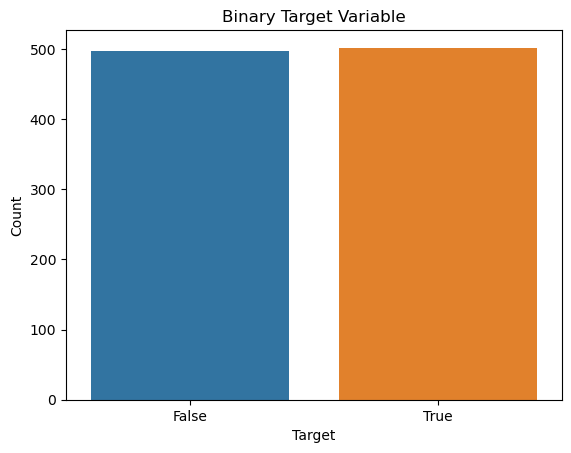

In [11]:
import seaborn as sns

sns.countplot(data=df_raw, x = 'Class')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Binary Target Variable')
plt.show()

Dataset is balanced.

* It is best practice to perform preprocessing steps separately on the training and testing data. This ensures that the preprocessing is done in a way that reflects only the information available in the training set and avoids any data leakage.   
* Before proceeding, it would be beneficial to determine if there are categorical values in the dataset. One way is to look at the the number of uniq values of each feature. If a feature has just a few number of uniq values, it would be a  categorical variable. While examining the data types, it is worth noting that features F3 and F14 are of integer type, suggesting they could potentially be categorical or binary values.

In [12]:
# Calculate the number of unique values for each feature
unique_counts = df_raw.nunique()
unique_counts

F1       936
F2       948
F3         2
F4       983
F5       966
F6       974
F7       944
F8       980
F9       947
F10      951
F11      946
F12        2
F13      976
F14        2
F15      942
F16      973
F17      985
F18      955
F19      979
F20      302
Class      2
dtype: int64

So as we can see F3, F12, F14, and the target variable are categorical.

In [13]:
categorical_features = ['F3', 'F12', 'F14']
for f in categorical_features:
    print(df_raw[f].value_counts(),'\n')

1    516
0    484
Name: F3, dtype: int64 

-1.96    507
-0.96    493
Name: F12, dtype: int64 

1    508
0    492
Name: F14, dtype: int64 



In [14]:
# Assuming you have your data stored in X (features) and y (labels/targets)
X = df_raw.iloc[:,:-1].copy()
y = df_raw.iloc[:,-1].copy()


# Preprocessing   

1. Outlier Detection
2. Filling missing values   
2.1 SimpleImputer --> ('mean')
3. Feature Scaling   
3.1 min_max scaler --> (0,1)

## Outlier Detection
To detect outliers in your dataset, you can utilize various statistical and machine learning techniques. Here are a few common approaches:

* Statistical Methods:

    * Z-Score: Calculate the Z-Score of each data point, which measures the number of standard deviations a data point is away from the mean. Points with a Z-Score above a certain threshold can be considered outliers.   
    * IQR (Interquartile Range): Calculate the IQR of your data, which is the range between the 25th and 75th percentiles. Data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR can be flagged as outliers.      
    
* Distance-based Methods:  

    * K-Nearest Neighbors (KNN): Use KNN algorithm to find the K nearest neighbors of each data point. If a point has significantly fewer neighbors or its neighbors are far away, it might be an outlier.    
    * DBSCAN (Density-Based Spatial Clustering of Applications with Noise): This algorithm clusters the data based on density and marks points that have low density or lie in sparse regions as outliers.    

                     
* Machine Learning-based Methods:   

    * Isolation Forest: This algorithm builds an ensemble of decision trees and isolates outliers based on how easily they can be isolated during the training process.   
    * Local Outlier Factor (LOF): LOF calculates the local density deviation of a data point with respect to its neighbors. Points with a significantly lower density than their neighbors are considered outliers.

* Visualization Techniques:

    * Scatter Plots: Visualize your data using scatter plots and look for data points that are significantly distant from the bulk of the data.   
    * Box Plots: Use box plots to identify data points that fall beyond the whiskers, which represent the data range.     
It's important to note that outlier detection is problem-dependent, and the choice of method may vary based on the characteristics and nature of your data. It's often recommended to combine multiple outlier detection techniques and examine the results to gain a comprehensive understanding of potential outliers in your dataset.

In [15]:

# numerical and categorical features
features = X.columns.to_list()
categorical_features = ['F3', 'F12', 'F14']
numerical_features = sorted(list(set(features) - set(categorical_features)), key=lambda x: int(x[1:]))
numerical_features

['F1',
 'F2',
 'F4',
 'F5',
 'F6',
 'F7',
 'F8',
 'F9',
 'F10',
 'F11',
 'F13',
 'F15',
 'F16',
 'F17',
 'F18',
 'F19',
 'F20']

In [16]:
X_num = X[numerical_features].copy()
X_cat = X[categorical_features].copy()

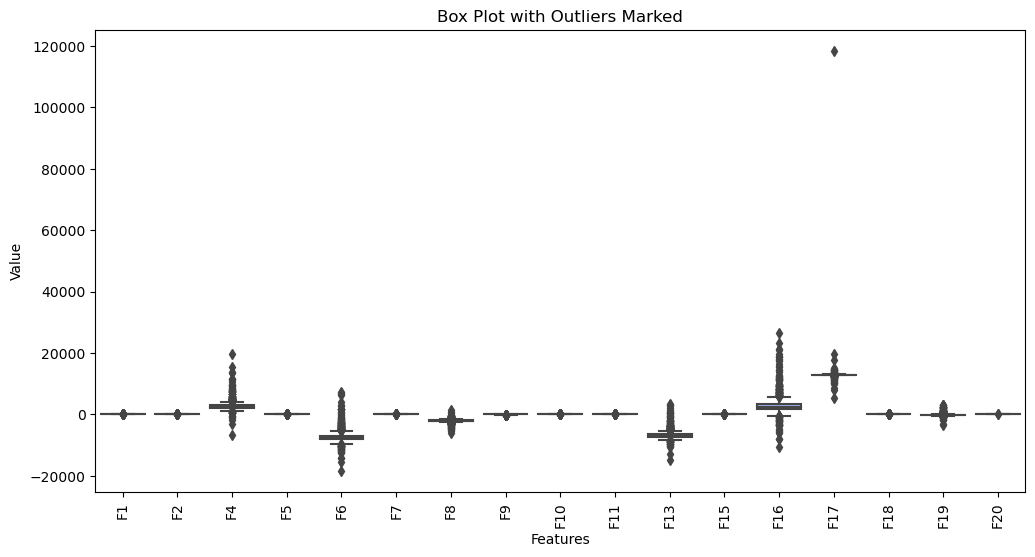

In [17]:
# To plot a box plot based on the standardScaler transform which map the data to a new distribution of mean equals to 0 with a variance of 1.


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.preprocessing import StandardScaler


# Apply StandardScaler to normalize the numerical features

numerical_features_scaled = pd.DataFrame(X_num,
                                         columns=X_num.columns)



# Plot box plots and mark outliers with red dots
plt.figure(figsize=(12, 6))
sns.boxplot(data=numerical_features_scaled)

plt.xlabel('Features')
plt.ylabel('Value')
plt.title('Box Plot with Outliers Marked')
plt.xticks(rotation=90)
plt.show()



AS it is obvious, F17 has a outlier. So we can plot it separately:

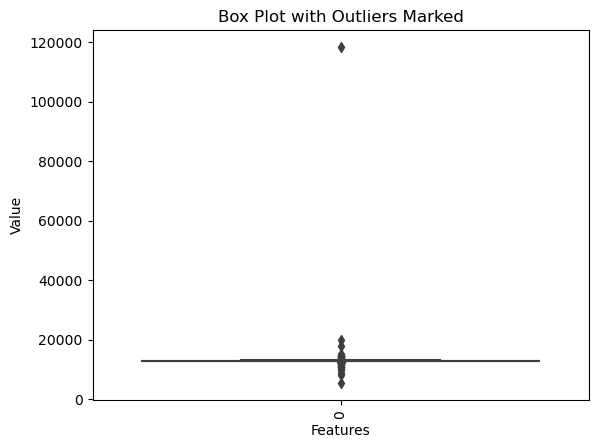

In [18]:
# Plot box plots and mark outliers with red dots
plt.figure()
sns.boxplot(data=X_num.loc[:, 'F17'])

plt.xlabel('Features')
plt.ylabel('Value')
plt.title('Box Plot with Outliers Marked')
plt.xticks(rotation=90)
plt.show()

#--> its value is more than 10e6


In [19]:
# To replace the maximum value in a column with the mean of that column
column_mean = X['F17'].mean()
max_value = X['F17'].max()
X.loc[X['F17'] == max_value, 'F17'] = column_mean




In [20]:
# To replace the maximum value in a column with the mean of that column
column_mean = X_num['F17'].mean()
max_value = X_num['F17'].max()
X_num.loc[X_num['F17'] == max_value, 'F17'] = column_mean


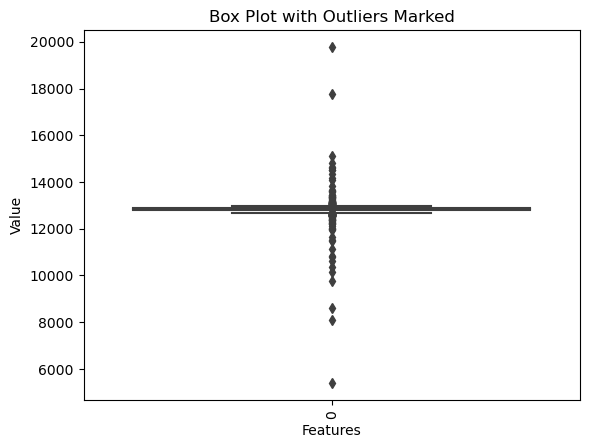

In [21]:
# Plot box plots and mark outliers 
plt.figure()
sns.boxplot(data=X_num.loc[:, 'F17'])

plt.xlabel('Features')
plt.ylabel('Value')
plt.title('Box Plot with Outliers Marked')
plt.xticks(rotation=90)
plt.show()




In [22]:
q1 = np.percentile(X_num['F17'], 25)
q3 = np.percentile(X_num['F17'], 75)
iqr = q3 - q1
print(q1)
print(q3)
print(iqr)


12794.09
12870.38
76.28999999999905


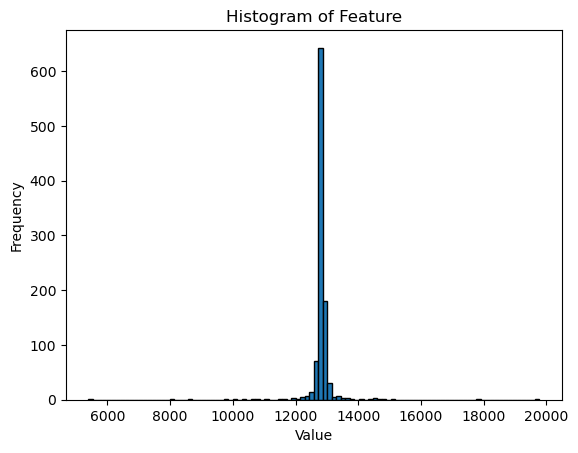

In [23]:
plt.hist(X_num['F17'], bins=100, edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')

# Display the plot
plt.show()

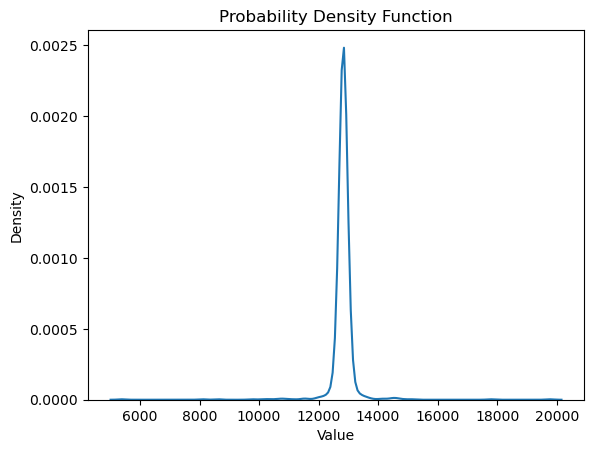

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your feature data
sns.kdeplot(X_num['F17'])

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Probability Density Function')

# Display the plot
plt.show()


In [25]:

#  to count the number of data points outside the IQR range. 


# Calculate quartiles and IQR
q1 = np.percentile(X_num['F17'], 25)
q3 = np.percentile(X_num['F17'], 75)
iqr = q3 - q1

# Calculate lower and upper boundaries for outliers
lower_boundary = q1 - 1.5 * iqr
upper_boundary = q3 + 1.5 * iqr

# Find indices of data points outside the IQR
outliers_indices = np.where((X_num['F17'] < lower_boundary) | (X_num['F17'] > upper_boundary))

# Count the number of outliers
outliers_count = len(outliers_indices[0])

print("Number of outliers: ", outliers_count)

Number of outliers:  155


In [26]:
outliers_indices

(array([  4,  13,  15,  17,  20,  22,  27,  54,  68,  79,  90,  94, 107,
        118, 130, 132, 136, 141, 143, 144, 146, 153, 159, 165, 171, 180,
        182, 189, 195, 196, 203, 212, 232, 235, 237, 240, 253, 257, 269,
        275, 279, 285, 287, 289, 291, 298, 300, 308, 316, 325, 330, 331,
        334, 337, 340, 351, 366, 370, 372, 381, 405, 408, 416, 424, 434,
        441, 450, 455, 465, 467, 471, 473, 477, 495, 503, 504, 505, 508,
        524, 529, 546, 548, 553, 558, 568, 571, 574, 596, 598, 601, 604,
        607, 610, 614, 616, 619, 622, 623, 630, 634, 637, 639, 655, 663,
        665, 668, 669, 674, 680, 684, 699, 701, 703, 713, 717, 722, 738,
        747, 754, 755, 760, 765, 768, 770, 782, 787, 800, 807, 808, 810,
        821, 827, 831, 833, 854, 861, 877, 880, 888, 901, 907, 909, 918,
        919, 924, 939, 941, 947, 963, 969, 970, 974, 977, 982, 998]),)

In [27]:
import pandas as pd
# Define a function to remove outliers based on IQR
def remove_outliers(column, iqr_factor=1.5):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - iqr_factor * iqr
    upper_bound = q3 + iqr_factor * iqr
    return column[(column >= lower_bound) & (column <= upper_bound)]

# Apply remove_outliers function to each column using apply method
df_cleaned = X_num.apply(remove_outliers)

# Print the cleaned DataFrame
df_cleaned

,F1,F2,F4,F5,F6,F7,F8,F9,F10,F11,F13,F15,F16,F17,F18,F19,F20
0,3.4009,9.0180,2429.040,1.57290,-6901.08,-13.5480,-2204.77,-43.1740,-4.3000,5.44580,-7144.90,-4.4310,2451.300,12843.744,12.90000,-121.7200,NaN
1,3.2476,7.4216,3365.160,NaN,-8939.28,-12.7050,NaN,-43.0300,-3.8674,4.80316,-7022.70,-6.3270,2274.330,12726.420,10.35480,NaN,NaN
2,2.6765,7.3124,3616.860,1.83040,-8944.38,-7.2657,-1898.57,-42.7656,-4.0435,7.01400,-6071.90,-4.3770,2111.937,12842.944,NaN,-362.2200,NaN
3,3.2465,7.4268,2263.965,1.53570,-8197.68,-12.9780,-2195.97,-45.5070,-5.1800,5.38460,-6703.30,-2.3304,4110.300,12812.392,15.83700,-318.6800,24.80
4,3.3116,7.6242,1669.560,1.55970,-8021.43,-8.9535,-2091.79,-45.5200,NaN,10.11800,-6999.90,-3.0663,3516.600,NaN,9.69801,-285.3720,24.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.2998,6.9476,NaN,2.66000,-7827.90,-9.1083,-2055.86,-49.3040,-3.8194,9.93200,-6889.30,-5.0730,2001.660,12864.820,12.37860,-326.3600,NaN
996,3.7300,10.7520,2456.070,1.57300,-8052.72,-8.5884,-1987.50,-44.9940,-4.2565,6.33000,-7115.72,-4.3290,2783.700,12870.380,12.83400,-353.3400,NaN
997,2.6816,7.1998,2346.180,1.27173,-7987.92,-8.5365,NaN,-54.4000,-4.6070,4.83520,NaN,-4.7730,2826.900,12728.520,13.61100,-244.4000,18.68
998,2.6278,11.1120,2415.270,1.29866,-7831.50,-10.6890,-2032.43,-46.3130,-4.5820,5.52400,NaN,-10.8000,1824.060,NaN,13.98300,-298.5386,NaN


In [28]:
# Drop rows with NaN values
df_cleaned = df_cleaned.dropna()

df_cleaned

,F1,F2,F4,F5,F6,F7,F8,F9,F10,F11,F13,F15,F16,F17,F18,F19,F20
3,3.2465,7.4268,2263.965,1.53570,-8197.680,-12.9780,-2195.97,-45.5070,-5.1800,5.3846,-6703.30,-2.3304,4110.30,12812.392,15.8370,-318.68,24.80
24,3.0160,7.4418,3790.560,2.22940,-7226.580,-9.3900,-2019.14,-52.4400,-4.3980,9.7400,-7174.04,-6.4650,1822.71,12833.282,16.4280,-291.92,23.32
26,4.2470,7.6286,2121.630,1.23472,-8062.680,-8.5449,-2199.67,-49.2670,-4.4270,6.8260,-6901.50,-4.7670,1913.70,12806.780,12.5760,-232.44,22.12
31,2.9042,9.4380,2672.160,2.24400,-7877.532,-8.2845,-2033.35,-59.3700,-4.1526,7.1700,-6508.50,-2.2896,3052.80,12886.740,12.3300,-336.96,24.56
42,2.7073,8.1220,2246.910,1.27173,-8148.240,-10.5810,-1859.37,-53.7400,-4.2132,5.4756,-7174.90,-6.0990,2446.20,12805.020,13.5900,-343.96,25.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,3.3021,7.1892,3525.960,1.50730,-7941.780,-9.5652,-2147.33,-47.2620,-4.5350,7.3040,-6367.50,-6.4440,1845.90,12815.390,11.5098,-240.98,21.50
972,3.5840,9.4980,2350.950,1.49750,-6660.480,-9.9240,-1997.05,-44.4920,-4.1913,8.1160,-7729.50,-2.7978,4231.50,12824.796,11.6766,-130.86,23.52
986,2.7882,7.4018,2109.060,1.83670,-7809.000,-8.4399,-2320.37,-46.0400,-5.5240,4.8888,-6444.90,-1.4910,2826.60,12814.138,11.4801,-185.90,19.42
989,4.7870,8.0578,2920.560,2.24700,-9310.080,-10.5540,-2161.16,-42.2896,-3.8121,6.0608,-6962.70,-5.4600,2733.90,12891.200,14.3010,-348.42,24.22


As it is obvious, it is a not a good way to drop samples that are out of IQR. --> the remaining samples would be 118 out of 1000.

just for the sake of visualization, the box-plot of each feature after the iqr outlier removal is presented.

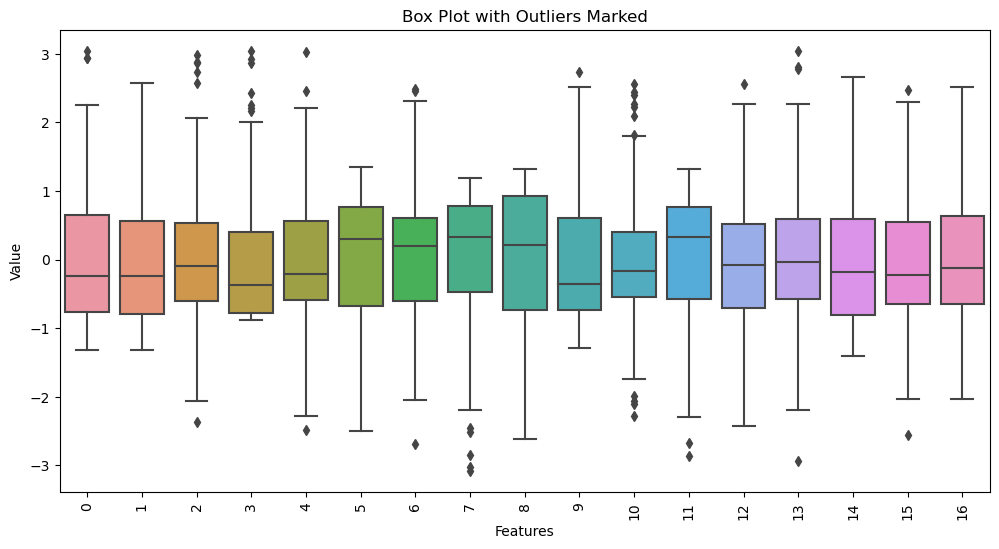

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Plot box plots and mark outliers with red dots
plt.figure(figsize=(12, 6))
sns.boxplot(data=scaler.fit_transform(df_cleaned))

plt.xlabel('Features')
plt.ylabel('Value')
plt.title('Box Plot with Outliers Marked')
plt.xticks(rotation=90)
plt.show()

## Pipeline 

In this phase after we use pipeline to fill the missing values and then use min_max scaler to transform data to [0,1] intervale. 



In [30]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier




# Assuming you have your X and y data ready for training



# Define the models to be evaluated
models = [
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('Naive Bayes', GaussianNB()),
    ('LogisticRegression', LogisticRegression()),
    ('DecisionTreeClassifier',DecisionTreeClassifier()),
    ('XGBClassifier', XGBClassifier()),
    ('KNeighborsClassifier',KNeighborsClassifier()),

]

# Perform cross-validation for each model
for model_name, model in models:

    # Define the pipeline
    pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Replace missing values with mean
    ('scaler', MinMaxScaler()),  # Min-max scaling
    ('model', model) 
    ])




    # The return_train_score parameter is set to False to exclude the training scores from the results
    cv_scores = cross_validate(pipeline, X, y, cv=10, scoring='accuracy', return_train_score=False)  # Perform 5-fold cross-validation with accuracy metric

    print(f"{model_name} - Mean CV Score for Test Fold:", cv_scores['test_score'].mean(),'\n Standard Deviation of Scores:', cv_scores['test_score'].std())
    print(cv_scores['test_score'])
    print('****************************************')


Random Forest - Mean CV Score for Test Fold: 0.876 
 Standard Deviation of Scores: 0.026532998322843223
[0.87 0.9  0.88 0.83 0.87 0.86 0.86 0.93 0.86 0.9 ]
****************************************
SVM - Mean CV Score for Test Fold: 0.7210000000000001 
 Standard Deviation of Scores: 0.037
[0.73 0.74 0.69 0.67 0.74 0.77 0.7  0.77 0.74 0.66]
****************************************
Naive Bayes - Mean CV Score for Test Fold: 0.658 
 Standard Deviation of Scores: 0.05599999999999998
[0.7  0.61 0.61 0.64 0.55 0.71 0.7  0.66 0.75 0.65]
****************************************
LogisticRegression - Mean CV Score for Test Fold: 0.719 
 Standard Deviation of Scores: 0.031764760348537174
[0.71 0.75 0.73 0.65 0.74 0.72 0.76 0.74 0.71 0.68]
****************************************
DecisionTreeClassifier - Mean CV Score for Test Fold: 0.841 
 Standard Deviation of Scores: 0.04482186966202994
[0.88 0.82 0.89 0.81 0.86 0.84 0.74 0.81 0.87 0.89]
****************************************
XGBClassifier - M

The first three best models are XGboost, Random Forest, and Decision Tree. 

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.pipeline import Pipeline

# Assuming you have your X and y data ready for training

# Define the parameter grids for each model
rf_param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 5, 10]
}

dt_param_grid = {
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split': [2, 5, 10]
}

xgb_param_grid = {
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.1, 0.2, 0.3]
}

# Create the models
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()
xgb_model = xgb.XGBClassifier()

def pipelined_model(model):
    # Define the pipeline
    pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Replace missing values with mean
    ('scaler', MinMaxScaler()),  # Min-max scaling
    ('model', model) 
    ])
    return pipeline




# Create the grid search objects for each model
rf_grid_search = GridSearchCV(pipelined_model(rf_model), rf_param_grid, cv=5)
dt_grid_search = GridSearchCV(pipelined_model(dt_model), dt_param_grid, cv=5)
xgb_grid_search = GridSearchCV(pipelined_model(xgb_model), xgb_param_grid, cv=5)

# Fit the grid search objects to the data
rf_grid_search.fit(X, y)
dt_grid_search.fit(X, y)
xgb_grid_search.fit(X, y)

# Access the best parameters and best scores for each model
print("Random Forest - Best Parameters:", rf_grid_search.best_params_)
print("Random Forest - Best Score:", rf_grid_search.best_score_)
print()
print("Decision Tree - Best Parameters:", dt_grid_search.best_params_)
print("Decision Tree - Best Score:", dt_grid_search.best_score_)
print()
print("XGBoost - Best Parameters:", xgb_grid_search.best_params_)
print("XGBoost - Best Score:", xgb_grid_search.best_score_)


Random Forest - Best Parameters: {'model__max_depth': None, 'model__n_estimators': 300}
Random Forest - Best Score: 0.8800000000000001

Decision Tree - Best Parameters: {'model__max_depth': 10, 'model__min_samples_split': 5}
Decision Tree - Best Score: 0.841

XGBoost - Best Parameters: {'model__learning_rate': 0.3, 'model__max_depth': 7}
XGBoost - Best Score: 0.9030000000000001


Still XGboost has the best performance

Now I want to perform grid search on a rather comprehensive param_grid for each of RAndomForest, DecisionTree and XGboost

# Model Selection 

## Decision Tree

Perform a grid search for a decision tree classifier with three different imputation methods

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Define the pipeline with the imputation strategy, min-max scaler, and the decision tree classifier
pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', MinMaxScaler()),
    ('model', DecisionTreeClassifier())
])

# Define the parameter grid with the imputation strategies 
param_grid = {
    'imputer__strategy': ['mean', 'median', 'most_frequent'],
    'model__max_depth': [10],
    'model__min_samples_split': [2]
}

# Perform the grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X, y)


# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'imputer__strategy': 'most_frequent', 'model__max_depth': 10, 'model__min_samples_split': 2}
Best Score: 0.8640000000000001


To plot the accuracy for all three imputation methods, you can use the cv_results_ attribute of the GridSearchCV object

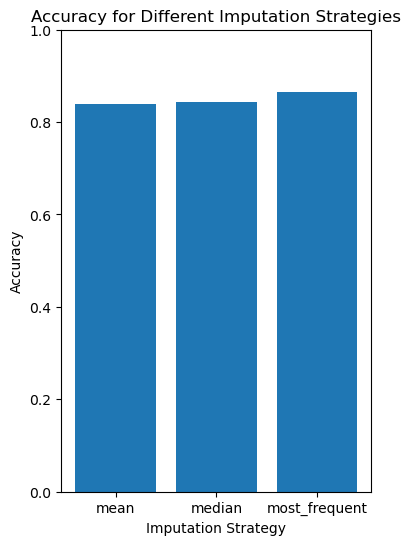

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Get the results from the grid search
results = grid_search.cv_results_

# Get the mean test scores and imputation strategies
mean_test_scores = results['mean_test_score']
imputation_strategies = results['param_imputer__strategy']

# Plot the accuracy for each imputation strategy
plt.figure(figsize=(4, 6))
plt.bar(imputation_strategies, mean_test_scores)
plt.xlabel('Imputation Strategy')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Imputation Strategies')
plt.ylim([0, 1])
plt.show()


## RandomForest

Perform grid search in 3 different stage because the permutation of parameters is huge.

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier



# Define the parameter grid for Random Forest
param_grid = {
    'imputer__strategy':['mean', 'median', 'most_frequent'],

    'model__n_estimators': [100, 200, 300],
   # 'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [None, 5, 10, 20],
    # 'model__min_samples_split': [2, 5, 10],
    # 'model__min_samples_leaf': [1, 2, 4],
    # 'model__max_features': ['sqrt', 'log2'],
   # 'model__bootstrap': [True, False],
   # 'model__class_weight': [None, 'balanced']
}




def pipelined_model(model):
    # Define the pipeline
    pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Replace missing values with mean
    ('scaler', MinMaxScaler()),  # Min-max scaling
    ('model', model) 
    ])
    return pipeline


# Create the Random Forest model
model = RandomForestClassifier()


# Create the grid search objects for each model
grid_search = GridSearchCV(pipelined_model(model), param_grid, cv=5, verbose=1)
 



grid_search.fit(X, y)

# Access the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)



Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'imputer__strategy': 'most_frequent', 'model__max_depth': 20, 'model__n_estimators': 300}
Best Score: 0.889


In [36]:
gs1_result = grid_search.cv_results_.copy()
gs1_result

{'mean_fit_time': array([0.31391282, 0.58234696, 0.92079196, 0.2337049 , 0.45810709,
        0.67731676, 0.27599244, 0.55428157, 0.82086968, 0.28655581,
        0.55726471, 0.83900285, 0.28562417, 0.55728493, 0.87156453,
        0.23286619, 0.44962683, 0.67384696, 0.27957649, 0.54611964,
        0.81243453, 0.27906199, 0.56048245, 0.82774935, 0.28458481,
        0.57661057, 0.89132662, 0.24098821, 0.48434801, 0.70261269,
        0.29736948, 0.57536306, 0.89718189, 0.30130105, 0.5780333 ,
        0.83550105]),
 'std_fit_time': array([0.02620718, 0.03060206, 0.05585097, 0.01194952, 0.01183168,
        0.0105472 , 0.00243785, 0.00580756, 0.00569758, 0.00420119,
        0.00226384, 0.01122155, 0.0038144 , 0.00319128, 0.01196231,
        0.00830414, 0.00621677, 0.00658091, 0.00528898, 0.00455388,
        0.01257803, 0.00284507, 0.00847217, 0.00411157, 0.00263477,
        0.0036701 , 0.03108364, 0.00485954, 0.03951174, 0.02964528,
        0.01057174, 0.00876653, 0.05964339, 0.00443313, 0.008

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier



# Define the parameter grid for Random Forest
param_grid = {
    'imputer__strategy':['most_frequent'],

    'model__n_estimators': [300],
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    # 'model__max_features': ['sqrt', 'log2'],
   # 'model__bootstrap': [True, False],
   # 'model__class_weight': [None, 'balanced']
}




def pipelined_model(model):
    # Define the pipeline
    pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Replace missing values with mean
    ('scaler', MinMaxScaler()),  # Min-max scaling
    ('model', model) 
    ])
    return pipeline


# Create the Random Forest model
model = RandomForestClassifier()


# Create the grid search objects for each model
grid_search = GridSearchCV(pipelined_model(model), param_grid, cv=5, verbose=1)
 



grid_search.fit(X, y)

# Access the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'imputer__strategy': 'most_frequent', 'model__criterion': 'entropy', 'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 300}
Best Score: 0.889


In [38]:
gs2_result = grid_search.cv_results_.copy()
gs2_result

{'mean_fit_time': array([0.88826756, 0.83488679, 0.82783718, 0.82469468, 0.81166692,
        0.79918427, 0.77813115, 0.77673273, 0.77393403, 0.98126621,
        0.98501272, 0.96628022, 0.97847376, 0.98910193, 0.94881139,
        0.91542997, 0.93512564, 0.9926137 ]),
 'std_fit_time': array([0.04873098, 0.00634726, 0.02051243, 0.00663961, 0.00166863,
        0.01233949, 0.00769088, 0.00422566, 0.00568638, 0.00762691,
        0.01550565, 0.01199718, 0.024659  , 0.01599882, 0.00628883,
        0.00653851, 0.0228252 , 0.0903178 ]),
 'mean_score_time': array([0.03884454, 0.03528085, 0.03501449, 0.03715138, 0.03504891,
        0.0347446 , 0.0346611 , 0.03428798, 0.03509269, 0.03572688,
        0.03537326, 0.03510852, 0.03675299, 0.03580604, 0.03505893,
        0.03542304, 0.03484845, 0.03490343]),
 'std_score_time': array([0.00396505, 0.00062908, 0.000562  , 0.00283798, 0.00065183,
        0.00071681, 0.00050783, 0.0004519 , 0.00030821, 0.00069146,
        0.00063317, 0.00042426, 0.00294227, 

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier



# Define the parameter grid for Random Forest
param_grid = {
    'imputer__strategy':['most_frequent'],

    'model__n_estimators': [300],
    'model__criterion': ['entropy'],
    'model__max_depth': [20],
    'model__min_samples_split': [2,],
    'model__min_samples_leaf': [2],
    'model__max_features': ['sqrt', 'log2'],
   'model__bootstrap': [True, False],
   'model__class_weight': [None, 'balanced']
}




def pipelined_model(model):
    # Define the pipeline
    pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Replace missing values with mean
    ('scaler', MinMaxScaler()),  # Min-max scaling
    ('model', model) 
    ])
    return pipeline


# Create the Random Forest model
model = RandomForestClassifier()


# Create the grid search objects for each model
grid_search = GridSearchCV(pipelined_model(model), param_grid, cv=5, verbose=1)
 



grid_search.fit(X, y)

# Access the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'imputer__strategy': 'most_frequent', 'model__bootstrap': False, 'model__class_weight': None, 'model__criterion': 'entropy', 'model__max_depth': 20, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 300}
Best Score: 0.8960000000000001


In [40]:
gs3_result = grid_search.cv_results_.copy()
gs3_result

{'mean_fit_time': array([1.002986  , 0.98383646, 0.99096484, 0.99134135, 1.26007957,
        1.25839496, 1.33440924, 1.32459083]),
 'std_fit_time': array([0.05106505, 0.00862619, 0.0339358 , 0.02134004, 0.03052211,
        0.02168792, 0.02393   , 0.02095316]),
 'mean_score_time': array([0.03569374, 0.03619475, 0.03774447, 0.03538232, 0.03679953,
        0.03731747, 0.03574457, 0.03670435]),
 'std_score_time': array([0.00077688, 0.00056009, 0.00495609, 0.00058983, 0.00101923,
        0.00093939, 0.00060441, 0.00073729]),
 'param_imputer__strategy': masked_array(data=['most_frequent', 'most_frequent', 'most_frequent',
                    'most_frequent', 'most_frequent', 'most_frequent',
                    'most_frequent', 'most_frequent'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_model__bootstrap': masked_array(data=[True, True, True, True, False, False, False, False],
              mask=[Fa

Perform a grid search for a Random Forest classifier with three different imputation methods

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier



# Define the parameter grid for Random Forest
param_grid = {
    'imputer__strategy':['mean','median','most_frequent'],

    'model__n_estimators': [300],
    'model__criterion': ['entropy'],
    'model__max_depth': [20],
    'model__min_samples_split': [2,],
    'model__min_samples_leaf': [2],
    'model__max_features': ['sqrt'],
   'model__bootstrap': [False],
   'model__class_weight': ['balanced']
}



def pipelined_model(model):
    # Define the pipeline
    pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Replace missing values with mean
    ('scaler', MinMaxScaler()),  # Min-max scaling
    ('model', model) 
    ])
    return pipeline


# Create the Random Forest model
model = RandomForestClassifier()


# Create the grid search objects for each model
grid_search = GridSearchCV(pipelined_model(model), param_grid, cv=5, verbose=1)
 



grid_search.fit(X, y)

# Access the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'imputer__strategy': 'median', 'model__bootstrap': False, 'model__class_weight': 'balanced', 'model__criterion': 'entropy', 'model__max_depth': 20, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 300}
Best Score: 0.897


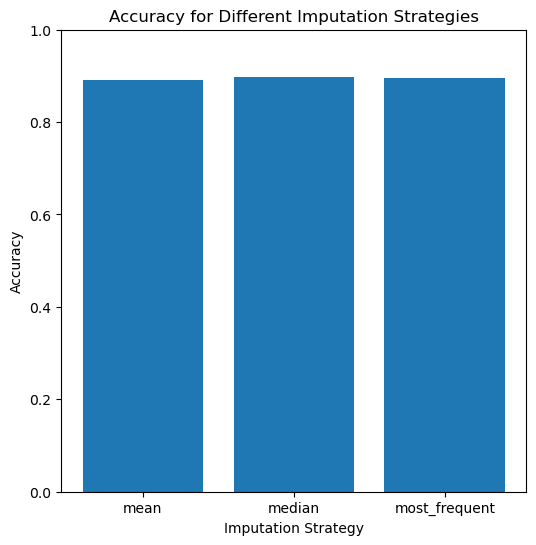

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Get the results from the grid search
results = grid_search.cv_results_

# Get the mean test scores and imputation strategies
mean_test_scores = results['mean_test_score']
imputation_strategies = results['param_imputer__strategy']

# Plot the accuracy for each imputation strategy
plt.figure(figsize=(6, 6))
plt.bar(imputation_strategies, mean_test_scores)
plt.xlabel('Imputation Strategy')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Imputation Strategies')
plt.ylim([0, 1])
plt.show()


When performing imputation, the goal is to estimate missing values based on the available information in the dataset. The target variable represents the variable of interest that we want to predict, and including it among the features used for imputation would result in leaking future information into the imputation process.

Including the target variable as a feature for imputation can lead to overly optimistic results and can introduce bias into the imputation process. It is generally recommended to exclude the target variable from the set of features used for imputing missing values.

1. Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction (2nd ed.). Springer. Chapter 6.5 discusses imputation and mentions that imputing missing values using the target variable can lead to optimistic bias.

2. Little, R. J. A., & Rubin, D. B. (2019). 
 (3rd ed.). John Wiley & Sons. Chapter 10 discusses imputation methods and mentions that including the target variable as a predictor in imputation can lead to biased results.

3. Enders, C. K. (2010). Applied Missing Data Analysis. Guilford Press. Chapter 4 covers imputation methods and emphasizes the importance of not including the outcome variable (target variable) as a predictor for imputation.

## XGBoost

Use random search

In [43]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Assuming you have your X and y data ready for training

# Create the XGBoost classifier model
model = xgb.XGBClassifier()


# Define the parameter grid
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.1, 0.01, 0.001],
    'model__max_depth': [3, 4, 5],
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0],
}


def pipelined_model(model):
    # Define the pipeline
    pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Replace missing values with mean
    ('scaler', MinMaxScaler()),  # Min-max scaling
    ('model', model) 
    ])
    return pipeline

# Create the XGBClassifier model
model = XGBClassifier()

# Create the random search object
grid_search = GridSearchCV(pipelined_model(model), param_grid=param_grid, cv=5, verbose=2)

# Fit the random search to the data
grid_search.fit(X, y)

# Access the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   0.4s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   0.4s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   0.1s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   0.2s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   0.2s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=0.9; total time=   0.2s
[CV] END model__colsample_bytree=0.8

In [44]:
gs_xgb_best_param1 =  grid_search.best_params_
gs_xgb_best_param1


{'model__colsample_bytree': 0.8,
 'model__learning_rate': 0.01,
 'model__max_depth': 5,
 'model__n_estimators': 300,
 'model__subsample': 0.9}

In [45]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Assuming you have your X and y data ready for training

# Create the XGBoost classifier model
model = xgb.XGBClassifier()


# Define the parameter grid
param_grid = {
    'imputer__strategy':['mean','median','most_frequent'],

    'model__n_estimators': [300],
    'model__learning_rate': [0.01],
    'model__max_depth': [5],
    'model__subsample': [0.9],
    'model__colsample_bytree': [0.8],
}


def pipelined_model(model):
    # Define the pipeline
    pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Replace missing values with mean
    ('scaler', MinMaxScaler()),  # Min-max scaling
    ('model', model) 
    ])
    return pipeline

# Create the XGBClassifier model
model = XGBClassifier()

# Create the random search object
grid_search = GridSearchCV(pipelined_model(model), param_grid=param_grid, cv=5, verbose=2)

# Fit the random search to the data
grid_search.fit(X, y)

# Access the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END imputer__strategy=mean, model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=300, model__subsample=0.9; total time=   1.2s
[CV] END imputer__strategy=mean, model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=300, model__subsample=0.9; total time=   0.7s
[CV] END imputer__strategy=mean, model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=300, model__subsample=0.9; total time=   1.0s
[CV] END imputer__strategy=mean, model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=300, model__subsample=0.9; total time=   0.7s
[CV] END imputer__strategy=mean, model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=300, model__subsample=0.9; total time=   0.7s
[CV] END imputer__strategy=median, model__colsample_bytree=0.8, m

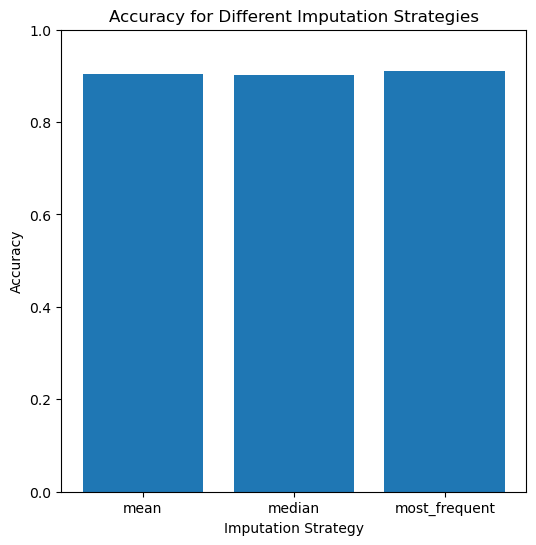

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Get the results from the grid search
results = grid_search.cv_results_

# Get the mean test scores and imputation strategies
mean_test_scores = results['mean_test_score']
imputation_strategies = results['param_imputer__strategy']

# Plot the accuracy for each imputation strategy
plt.figure(figsize=(6, 6))
plt.bar(imputation_strategies, mean_test_scores)
plt.xlabel('Imputation Strategy')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Imputation Strategies')
plt.ylim([0, 1])
plt.show()


As we can see in all this models, using "most_frequent" strategy for filling missing values has slightly better performance.

# Feature selection    
To perform correlation analysis between numerical features and a categorical target variable, you can use techniques such as ANOVA (Analysis of Variance) or chi-square test, depending on the nature of your data.

If your numerical features are continuous and your target variable is categorical, you can use ANOVA to measure the relationship between the features and the target. ANOVA assesses whether the means of the numerical features are significantly different across different categories of the target variable.

If your numerical features are discrete or ordinal, and your target variable is categorical, you can use a chi-square test to measure the association between the features and the target. The chi-square test evaluates whether there is a significant association between the two variables.

Here, we use the SelectKBest class from the feature_selection module and specify f_classif as the scoring function, which performs ANOVA F-value computation for feature selection in a classification context.

In [47]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Min-max scaling
    (('imputer', SimpleImputer(strategy='most_frequent'))),  # Replace missing values with mean
    ])


X_filled=  pd.DataFrame(pipeline.fit_transform(X), columns=X.columns)


# numerical and categorical features
features = X_filled.columns.to_list()
categorical_features = ['F3', 'F12', 'F14']
numerical_features = sorted(list(set(features) - set(categorical_features)), key=lambda x: int(x[1:]))
numerical_features

['F1',
 'F2',
 'F4',
 'F5',
 'F6',
 'F7',
 'F8',
 'F9',
 'F10',
 'F11',
 'F13',
 'F15',
 'F16',
 'F17',
 'F18',
 'F19',
 'F20']

In [48]:
X_num =  X_filled[numerical_features]
X_num

,F1,F2,F4,F5,F6,F7,F8,F9,F10,F11,F13,F15,F16,F17,F18,F19,F20
0,0.185846,0.264552,0.346334,0.056407,0.450708,0.413290,0.513290,0.983961,0.798548,0.080338,0.419750,0.760120,0.353804,0.517913,0.240283,0.510350,0.379822
1,0.151875,0.085250,0.382151,0.520809,0.371200,0.487356,0.790924,0.985721,0.893583,0.008771,0.426521,0.616504,0.349019,0.509754,0.051156,0.378211,0.379822
2,0.025324,0.072985,0.391781,0.098766,0.371001,0.965249,0.554646,0.988955,0.854897,0.254978,0.479209,0.764210,0.344629,0.517857,0.861120,0.473132,0.379822
3,0.151632,0.085834,0.340018,0.050288,0.400129,0.463370,0.514479,0.955432,0.605227,0.073522,0.444220,0.919234,0.398654,0.515732,0.458523,0.479870,0.718101
4,0.166057,0.108006,0.317275,0.054236,0.407004,0.816960,0.528549,0.955273,0.315465,0.600650,0.427785,0.863492,0.382603,0.000000,0.002352,0.485024,0.681009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.163442,0.032012,0.416357,0.235236,0.414554,0.803359,0.533402,0.909001,0.904128,0.579937,0.433913,0.711491,0.341648,0.519378,0.201539,0.478682,0.379822
996,0.258772,0.459309,0.347368,0.056423,0.405783,0.849037,0.542635,0.961705,0.808105,0.178805,0.421367,0.767846,0.362790,0.519765,0.235379,0.474506,0.379822
997,0.026454,0.060339,0.343163,0.006864,0.408311,0.853597,0.371691,0.846686,0.731106,0.012339,0.560013,0.734215,0.363958,0.509900,0.293115,0.491365,0.264095
998,0.014532,0.499743,0.345807,0.011294,0.414413,0.664480,0.536567,0.945576,0.736598,0.089046,0.613986,0.277688,0.336847,0.485160,0.320758,0.482987,0.379822


In [49]:
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming you have your X and y data ready for feature selection

# Create the ANOVA feature selector
selector = SelectKBest(score_func=f_classif, k=6)  # Select top 5 features based on ANOVA F-value

# Apply the feature selector to the data
X_selected = selector.fit_transform(X_num, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = [X_num.columns[idx] for idx in selected_feature_indices]

selected_features

['F2', 'F4', 'F10', 'F11', 'F16', 'F20']

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Random Forest
param_grid = {
    'imputer__strategy':['most_frequent'],

    'model__n_estimators': [300],
    'model__criterion': ['entropy'],
    'model__max_depth': [20],
    'model__min_samples_split': [2,],
    'model__min_samples_leaf': [2],
    'model__max_features': ['sqrt'],
   'model__bootstrap': [False],
   'model__class_weight': ['balanced']
}

def pipelined_model(model):
    # Define the pipeline
    pipeline = Pipeline([
    ('imputer', SimpleImputer()),  # Replace missing values with mean
    ('scaler', MinMaxScaler()),  # Min-max scaling
    ('model', model) 
    ])
    return pipeline


# Create the Random Forest model
model = RandomForestClassifier()


# Create the grid search objects for each model
grid_search = GridSearchCV(pipelined_model(model), param_grid, cv=5, verbose=1)
 
grid_search.fit(X[selected_features + categorical_features], y)

# Access the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'imputer__strategy': 'most_frequent', 'model__bootstrap': False, 'model__class_weight': 'balanced', 'model__criterion': 'entropy', 'model__max_depth': 20, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 300}
Best Score: 0.9150000000000003


In [51]:
def feature_selection(X_numerical,y,num_features):


    # Create the ANOVA feature selector
    selector = SelectKBest(score_func=f_classif, k = num_features)  # Select top 5 features based on ANOVA F-value

    # Apply the feature selector to the data
    X_selected = selector.fit_transform(X_numerical, y)

    # Get the indices of the selected features
    selected_feature_indices = selector.get_support(indices=True)

    # Get the names of the selected features
    selected_features = [X_numerical.columns[idx] for idx in selected_feature_indices]

    return selected_features
        

In [52]:
best_scores = []
for i in range(len(X_num.columns.to_list())):
    selected_features = feature_selection(X_num, y , i+1)
    # Create the grid search objects for each model
    print(f"{i+1}")
    grid_search = GridSearchCV(pipelined_model(model), param_grid, cv=5, verbose=0)
    
    grid_search.fit(X[selected_features + categorical_features], y)

    print(grid_search.best_score_)
    best_scores.append(grid_search.best_score_)

1
0.601
2
0.762
3
0.9049999999999999
4
0.908
5
0.906
6
0.908
7
0.9099999999999999
8
0.9100000000000001
9
0.909
10
0.908
11
0.907
12
0.898
13
0.901
14
0.901
15
0.901
16
0.9029999999999999
17
0.8969999999999999


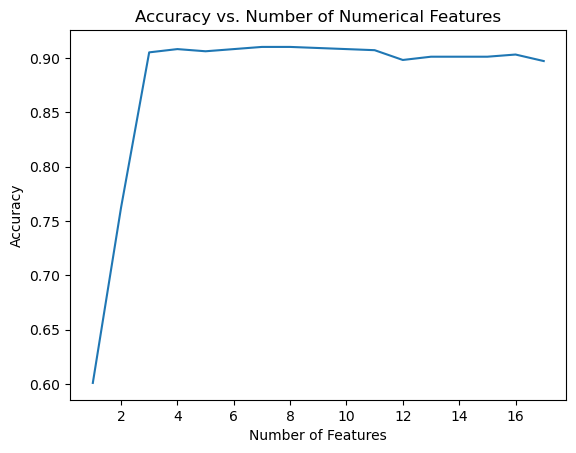

In [60]:
# Plot the accuracy scores
num_features = np.arange(len(X_num.columns.to_list())) + 1
plt.plot(num_features, best_scores)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Numerical Features')
plt.show()

After adding the first 3 important numerical features to the the 3 categorical feature that we had, there is no significant progress in the accuracy.

In [53]:
categorical_features

['F3', 'F12', 'F14']

In [54]:
first_3_numerical_features = feature_selection(X_num, y , 3)
first_3_numerical_features

['F4', 'F16', 'F20']

In [55]:
# So all important features would be :

important_features  = categorical_features + first_3_numerical_features
important_features

['F3', 'F12', 'F14', 'F4', 'F16', 'F20']

In [58]:
#but considering the first 8 numerical features give a slightly better performance.
important_features  = categorical_features + feature_selection(X_num, y , 8)
important_features

['F3', 'F12', 'F14', 'F2', 'F4', 'F6', 'F7', 'F10', 'F11', 'F16', 'F20']

In [61]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
pipeline = make_pipeline(
    MinMaxScaler(),
    SimpleImputer(strategy='most_frequent'),
    RandomForestClassifier(n_estimators=300, criterion='entropy',max_depth = 20, min_samples_split = 2,min_samples_leaf = 2,
                            max_features = 'sqrt',bootstrap = False , class_weight = 'balanced', random_state=42)
)



pipeline.fit(X[important_features], y) #--> Training on the whole dataset because we ant to make a prediction based on a completely new dataset for test


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False,
                                        class_weight='balanced',
                                        criterion='entropy', max_depth=20,
                                        min_samples_leaf=2, n_estimators=300,
                                        random_state=42))])

### Part B

In [62]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P2_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

# Make predictions on the test data
predicted = pipeline.predict(test_data[important_features])



# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])

In [64]:
np.unique(predicted, return_counts = True) # To see the predictions on the test dataset

(array([False,  True]), array([469, 531]))

Based on teh report of employer, The accuracy for test dataset was 91.9%